In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# 2 Exercise 1 - Implementation of Naive Bayes Algorithm
Build a Sentiment Analysis Model for IMDB Movie Review Dataset

# Question:
You are tasked with building a sentiment analysis model to classify movie reviews as positive or negative
using the IMDB Movie Review Dataset.

Part 1:

1. Load the dataset and preprocess the reviews.

    a. Convert all text to lowercase.

    b. Remove non-alphabetic characters (punctuation).

    c. Tokenize the reviews and remove common stopwords.

    d. Apply stemming to reduce words to their root form.


In [19]:
df = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/Week 10/IMDB Dataset.csv')

nltk.download('stopwords')

# to convert to lowercase
df['review'] = df['review'].str.lower()

# to remove special characters
df['review'] = df['review'].str.replace(r'[!@#$%&*()\-_=\+\[\];:\'\"?/]', '', regex=True)

# to tokenize the reviews
df['review'] = df['review'].str.split()

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# to remove stopwords, stemming, and join back strings
df['cleaned_review'] = df['review'].apply(lambda words: ' '.join(ps.stem(word) for word in words if word not in stop_words))
df.head(10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment,cleaned_review
0,"[one, of, the, other, reviewers, has, mentione...",positive,one review mention watch 1 oz episod youll hoo...
1,"[a, wonderful, little, production., <br, ><br,...",positive,wonder littl production. <br ><br >the film te...
2,"[i, thought, this, was, a, wonderful, way, to,...",positive,thought wonder way spend time hot summer weeke...
3,"[basically, theres, a, family, where, a, littl...",negative,basic there famili littl boy jake think there ...
4,"[petter, matteis, love, in, the, time, of, mon...",positive,petter mattei love time money visual stun film...
5,"[probably, my, alltime, favorite, movie,, a, s...",positive,"probabl alltim favorit movie, stori selflessne..."
6,"[i, sure, would, like, to, see, a, resurrectio...",positive,sure would like see resurrect date seahunt ser...
7,"[this, show, was, an, amazing,, fresh, innovat...",negative,"show amazing, fresh innov idea 70 first aired...."
8,"[encouraged, by, the, positive, comments, abou...",negative,encourag posit comment film look forward watch...
9,"[if, you, like, original, gut, wrenching, laug...",positive,like origin gut wrench laughter like movie. yo...


2. Split the dataset into training and testing sets (80% training, 20% testing).


In [20]:
from sklearn.model_selection import train_test_split

#splitting the data into train-test in the ratio of 80-20
X = df['cleaned_review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. Use a Naive Bayes classifier to classify the reviews into positive and negative categories.

    a. Implement a Bag-of-Words model using CountVectorizer.
    
    b. Train the Naive Bayes classifier using the training set.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

#implementing bag-of-words model using countvectorizer
vectorizer = CountVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [23]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

MultinomialNB()

Part 2:

1. Evaluate the performance of the model using the following metrics:

    a. Accuracy

    b. Precision, Recall, and F1-score

    c. Confusion Matrix

    d. ROC-AUC Score

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score

y_pred = nb.predict(X_test_vec)
y_prob = nb.predict_proba(X_test_vec)[:, 1]

#a
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)

#b
precision = precision_score(y_test, y_pred)
print("Precision Score: ", precision)
recall = recall_score(y_test, y_pred)
print("Recall Score: ", recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

#c
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

#d
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score: ", roc_auc)



Accuracy:  0.848
Precision Score:  0.8514080287597364
Recall Score:  0.846001190712443
F1 Score:  0.8486959984073263
Confusion Matrix: 
 [[4217  744]
 [ 776 4263]]
ROC-AUC Score:  0.9140092483226679


# 3 Feature Selection Exercise.
3.1 Feature Selection using Wrapper Methods.

Dataset: Breast Cancer Prognostic Dataset Objective

You are tasked with identifying the most important features in predicting breast cancer prognosis using the Breast Cancer Prognostic Dataset from the UCI Machine Learning Repository. Apply a wrapper method (Recursive Feature Elimination) to select the best features and evaluate your model’s performance.

# Part 1: Data Loading and Preprocessing

  1. Load the Breast Cancer Prognostic Dataset.

  2. Dataset is available in Drive.

  3. Perform basic exploratory data analysis (EDA) to understand the dataset:

      • Summarize key statistics for each feature.

      • Check for missing values and handle them appropriately.

  4. Split the dataset into training (80%) and testing (20%) sets.

In [40]:
bcpd = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/Week 10/Breast Cancer Wisconsin.csv')
bcpd.head()
bcpd.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [41]:
bcpd = bcpd.drop(columns=['Unnamed: 32'])
bcpd = bcpd.dropna()
print(bcpd.shape)

(569, 32)


In [43]:
X = bcpd.drop(['id','diagnosis'], axis=1)
y = bcpd['diagnosis'].map({'M':1, 'B':0})

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Part 2: Apply a Wrapper Method

1. Use Recursive Feature Elimination (RFE) with a Logistic Regression model to perform feature selection:

    • Select the top 5 features that contribute the most to predicting the target variable.
    
    • Visualize the ranking of features.
2. Train the Logistic Regression model using only the selected features.

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=5000)

rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

selected_features = X.columns[rfe.support_]
selected_features


Index(['radius_se', 'radius_worst', 'texture_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

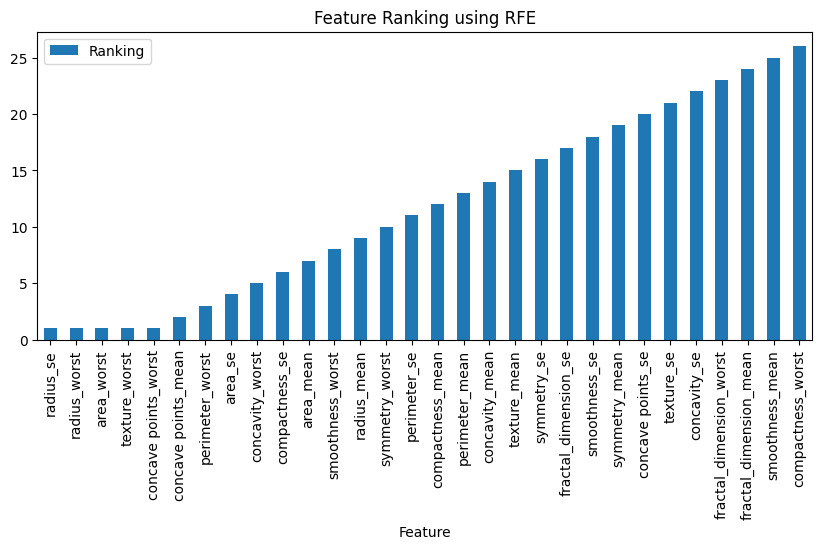

In [50]:
ranking = pd.DataFrame({'Feature': X.columns,'Ranking': rfe.ranking_}).sort_values('Ranking')
ranking.plot(x='Feature', y='Ranking', kind='bar', figsize=(10,4))
plt.title("Feature Ranking using RFE")
plt.show()

In [53]:
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

model.fit(X_train_sel, y_train)

LogisticRegression(max_iter=5000)

# Part 3: Model Evaluation

1. Evaluate the model’s performance using the testing set:

    • Metrics to calculate: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

2. Compare the performance of the model trained on all features versus the model trained on the selected features.

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_sel = model.predict(X_test_sel)
y_prob_sel = model.predict_proba(X_test_sel)[:,1]

print("Accuracy: ", accuracy_score(y_test, y_pred_sel))
print("Precision: ", precision_score(y_test, y_pred_sel))
print("Recall: ", recall_score(y_test, y_pred_sel))
print("F1-score: ", f1_score(y_test, y_pred_sel))
print("ROC-AUC: ", roc_auc_score(y_test, y_prob_sel))


Accuracy:  0.956140350877193
Precision:  0.9523809523809523
Recall:  0.9302325581395349
F1-score:  0.9411764705882353
ROC-AUC:  0.990501146413364


In [55]:
model.fit(X_train, y_train)
y_pred_all = model.predict(X_test)

print("Accuracy (All Features):", accuracy_score(y_test, y_pred_all))

Accuracy (All Features): 0.956140350877193


# Part 4: Experiment

1. Experiment with different numbers of selected features (e.g., top 3, top 7).

2. Discuss how feature selection affects model performance.

In [56]:
for n in [3, 7]:
    rfe = RFE(model, n_features_to_select=n)
    rfe.fit(X_train, y_train)

    features = X.columns[rfe.support_]
    model.fit(X_train[features], y_train)

    y_pred = model.predict(X_test[features])
    print(f"\nTop {n} Features Accuracy:", accuracy_score(y_test, y_pred))



Top 3 Features Accuracy: 0.8070175438596491

Top 7 Features Accuracy: 0.9736842105263158


**Feature selection helps reduce overfitting, improves interpretability, and can slightly improve or stabilize model performance. Selecting too few features may reduce accuracy, while selecting optimal features balances bias and variance.**